<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/UV_TSA_SALES_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Store Sales Analysis and Predeiction

## Description

Time-Series Analysis is an integral part of various Financial and Non-Financial applications. It helps us to understand the trends of the underlying phenomenon and make predictions for the future time.

## Learning Objectives

At the end of the mini project, you will be able to understand-
 
* Perform exhaustive Exploratory-Data-Analysis (EDA)
* Perform Data Engineering to convert the raw data into time series dataset
* Perform Time-Series-Analysis (TSA)
* Predict the sales of products

## About the Dataset.

The current Dataset is adapted from an **ongoing** Kaggle Competition from the [link](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).
But the end goals are slightly different from the competetion.

The following Description for each file is pasted here for your convenience.

* train.csv
  - The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
  - **store_nbr** identifies the store at which the products are sold.
  - **family** identifies the type of product sold.
  - **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
  - **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date
  
* test.csv
  - The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
  - The dates in the test data are for the 15 days after the last date in the training data.


**Python Packages used:**  

* [`Google.colab`](https://colab.research.google.com/notebooks/io.ipynb) for linking the notebook to your Google-drive
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the pre-processing data, building ML models, and performance metrics
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting
 and [`statsmodels`](https://www.statsmodels.org/dev/index.html) for time-series-analysis
* [`datetime`](https://docs.python.org/3/library/datetime.html) for converting string to datetime objects and vice-versa


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
import statsmodels as sm
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Graded Exercise (10 Marks)

### Exercise 1 (0.5 points): Data Acquision

- Load the FOLLOWING files into seperate `pandas` DataFrames - **train.csv** and **test.csv**
- Check the shape of the data
- Check the datatypes
- Check the Summary
- Check the nulls present in each field
- Discard/Fill with appropriate value, if any
- Check the unique number of entries per field
- Drop the features that are either redundant or that do not help in modelling

**Hint:** Use `pandas` module

In [ ]:
# YOUR CODE HERE
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= 'drive/MyDrive/Colab Notebooks/ADSMI assignments/Mini Projects/Module3/Week8 (Sales EDA+TSA)/Latest update/'

df_train= pd.read_csv(path+"train.csv");
df_test= pd.read_csv(path+"test.csv");

In [ ]:
# train
print("\033[1;32m Head of train: \033[0m")
print(df_train.head())
print("\033[1;32m Shape of train: \033[0m",df_train.shape)
print("\033[1;32m Data type of columns of train: \033[0m")
print(df_train.dtypes)
print("\033[1;32m Summary of train: \033[0m")
print(df_train.describe())
print("\033[1;32m Any null values exists in train: \033[0m")
print(df_train.isnull().values.any())
print("\033[1;32m Count of null values exists in train: \033[0m")
print(df_train.isnull().sum())
print("\033[1;32m Number of unique values in each column of train: \033[0m")
print(df_train.nunique(axis=0))
print("\033[1;32m List of columns in train: \033[0m")
print(df_train.columns.values.tolist())
df_train_u = df_train
df_train_u= df_train_u.drop(['id'], axis = 1) # Drop 'id' column
print("\033[1;32m List of columns in train after dropping columns: \033[0m")
print(df_train_u.columns.values.tolist())

 Head of train: 
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
 Shape of train:  (3000888, 6)
 Data type of columns of train: 
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
 Summary of train: 
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.

In [ ]:
# test
print("\033[1;32m Head of test: \033[0m")
print(df_test.head())
print("\033[1;32m Shape of test: \033[0m",df_test.shape)
print("\033[1;32m Data type of columns of test: \033[0m")
print(df_test.dtypes)
print("\033[1;32m Summary of test: \033[0m")
print(df_test.describe())
print("\033[1;32m Any null values exists in test: \033[0m")
print(df_test.isnull().values.any())
print("\033[1;32m Count of null values exists in test: \033[0m")
print(df_test.isnull().sum())
print("\033[1;32m Number of unique values in each column of test: \033[0m")
print(df_test.nunique(axis=0))
print("\033[1;32m List of columns in test: \033[0m")
print(df_test.columns.values.tolist())
df_test_u = df_test
df_test_u= df_test_u.drop(['id'], axis = 1) # Drop 'id' column
print("\033[1;32m List of columns in test after dropping columns: \033[0m")
print(df_test_u.columns.values.tolist())

 Head of test: 
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
 Shape of test:  (28512, 5)
 Data type of columns of test: 
id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object
 Summary of test: 
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    646.00

### Exercise 2 (1 point): Data Preparation

Convert the Multivariate Data into univariate data by performing the following filtering operations.

- Choose the `store_nbr` with the Highest Sales
- Choose the `family` with the Highest Sales
- Groupby the non-zero `onpromotion` by performing groupby and then aggregating with sum
- convert the `date` column to `pandas`'s datetime format and set it as the dataframe's index
- Discard all **BUT** sales column in the train dataframe
- Extract the unique dates from the `test` dataframe.

- **Hint**: Use the `pandas` module with

	- boolean indexing

	- `dataframe.groupby(column).agg(sum function)`

	- `set_index` of `pandas`

Finally you should have 2 dataframes (1 for train and 1 for test)

- Train dataframe
	- index as Datetime series (unique dates - no repeats)								
	- sales as the only column

- Test dataframe will have ONLY datetime based index with empty data or a pandas series with dates


In [ ]:
#Print all columns of train data after dropping 'id' column
print(df_train_u.columns.values.tolist())

['date', 'store_nbr', 'family', 'sales', 'onpromotion']


In [ ]:
# YOUR CODE HERE
# Choose the store_nbr with the Highest Sales
df_train_st = df_train_u[['store_nbr','sales']].groupby('store_nbr' ,as_index=False).agg({'sales':'sum'}).sort_values(['sales'],ascending=False)
print(df_train_st.head(1))

    store_nbr         sales
43         44  6.208755e+07


In [ ]:
#Choose the family with the Highest Sales

df_train_fm = df_train_u[['family','sales']].groupby('family' ,as_index=False).agg({'sales':'sum'}).sort_values(['sales'],ascending=False)
print(df_train_fm.head(1))

       family         sales
12  GROCERY I  3.434627e+08


In [ ]:
df_train_u.shape

(3000888, 5)

In [ ]:
# Groupby the non-zero onpromotion by performing groupby and then aggregating with sum
df_train_u[df_train_u['onpromotion'] != 0].groupby('onpromotion' ,as_index=False).agg({'sales':'sum'})

,onpromotion,sales
0,1,8.161246e+07
1,2,5.262701e+07
2,3,3.996452e+07
3,4,3.070657e+07
4,5,2.480159e+07
...,...,...
356,719,6.681000e+03
357,720,6.154000e+03
358,722,5.846000e+03
359,726,6.044000e+03


In [ ]:
df_train_u.shape

(3000888, 5)

In [ ]:
#convert the date column to pandas's datetime format
df_train_u['date'] = pd.to_datetime(df_train_u['date'])
df_test_u['date'] = pd.to_datetime(df_test_u['date'])

In [ ]:
#check 'date' of train has unique values are not
df_train_u['date'].is_unique

False

In [ ]:
# Printing column names and no.of rows and columns in train data frame before conversion
print(df_train_u.columns.values.tolist())
print(df_train_u.shape)

['date', 'store_nbr', 'family', 'sales', 'onpromotion']
(3000888, 5)


In [ ]:
# As the date column is not unique we cannot set the 'date' values as index. 
# So we are grouping by dates and summing sales.
# Setting the 'date' columns as index
# Discard all BUT sales column in the train dataframe
df_train_u= df_train_u.groupby('date' ,as_index=False).agg({'sales':'sum'}).set_index('date',verify_integrity=True)

print(df_train_u.columns.values.tolist())
print(df_train_u.shape)

['sales']
(1684, 1)


In [ ]:
# Printing column names and no.of rows and columns in test data frame before conversion
print(df_test_u.columns.values.tolist())
print(df_test_u.shape)

#check 'date' of test has unique values are not
df_test_u['date'].is_unique

['date', 'store_nbr', 'family', 'onpromotion']
(28512, 4)


False

In [ ]:
# Drop the duplicate 'date' rows from test
df_test_u= df_test_u.drop_duplicates(subset=['date'])

# Printing column names and no.of rows and columns in test data frame before conversion
print(df_test_u.columns.values.tolist())
print(df_test_u.shape)

['date', 'store_nbr', 'family', 'onpromotion']
(16, 4)


In [ ]:
#Extract the unique dates from the test dataframe.
df_test_u= df_test_u.set_index('date',verify_integrity=True).drop(['store_nbr', 'family', 'onpromotion'],axis=1)

print(df_test_u.columns.values.tolist())
print(df_test_u.shape)

[]
(16, 0)


In [ ]:
print("\033[1;32mShape of train after data processing: \033[0m",df_train_u.shape)
print(df_train_u.index)
print("\033[1;32mShape of test after data processing: \033[0m",df_test_u.shape)
print(df_test_u.index)

Shape of train after data processing:  (1684, 1)
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)
Shape of test after data processing:  (16, 0)
DatetimeIndex(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', freq=None)


### Exercise 3 (1 Point): Time-Series-Analysis

* Plot the Components:
  - Observed raw time-series data
  - Trend
  - Seasonality
  - Randomness/Residual

  **Hint**: Use `statsmodel`'s [`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) function

In [ ]:
# YOUR CODE HERE
#Our current datetime data can be tricky to work with.
# Therefore, we will use the averages daily sales value for that month instead.
# And we are using the start of each month as the timestamp.
train_series = df_train_u['sales'].resample('MS').mean()
print(train_series)

date
2013-01-01    333149.185062
2013-02-01    344962.849194
2013-03-01    368661.194758
2013-04-01    366448.824600
2013-05-01    374119.484098
2013-06-01    389644.802075
2013-07-01    363141.955086
2013-08-01    378638.352241
2013-09-01    393097.774396
2013-10-01    379858.721307
2013-11-01    411885.309766
2013-12-01    526770.571599
2014-01-01    610052.925852
2014-02-01    429941.165499
2014-03-01    656954.323112
2014-04-01    428708.368572
2014-05-01    431605.976168
2014-06-01    443998.605767
2014-07-01    626512.614317
2014-08-01    447908.916744
2014-09-01    667413.870460
2014-10-01    657938.752070
2014-11-01    684387.840121
2014-12-01    811348.478794
2015-01-01    480545.872813
2015-02-01    490799.851728
2015-03-01    503180.887689
2015-04-01    498502.272359
2015-05-01    571947.362720
2015-06-01    720512.011708
2015-07-01    716439.323830
2015-08-01    740763.685203
2015-09-01    774696.082597
2015-10-01    770266.698857
2015-11-01    760165.112274
2015-12-01    9

In [ ]:
train_series_df = pd.DataFrame({'date':train_series.index, 'sales':train_series.values})

In [ ]:
test_series = df_test_u.assign(Date=df_test_u.index).resample('d').mean()

In [ ]:
#Get the 2017 sales data
train_series['2017':]

date
2017-01-01    849295.481797
2017-02-01    830361.156248
2017-03-01    861419.925512
2017-04-01    863176.949652
2017-05-01    868124.104858
2017-06-01    856094.070833
2017-07-01    871337.985995
2017-08-01    828888.196052
Freq: MS, Name: sales, dtype: float64

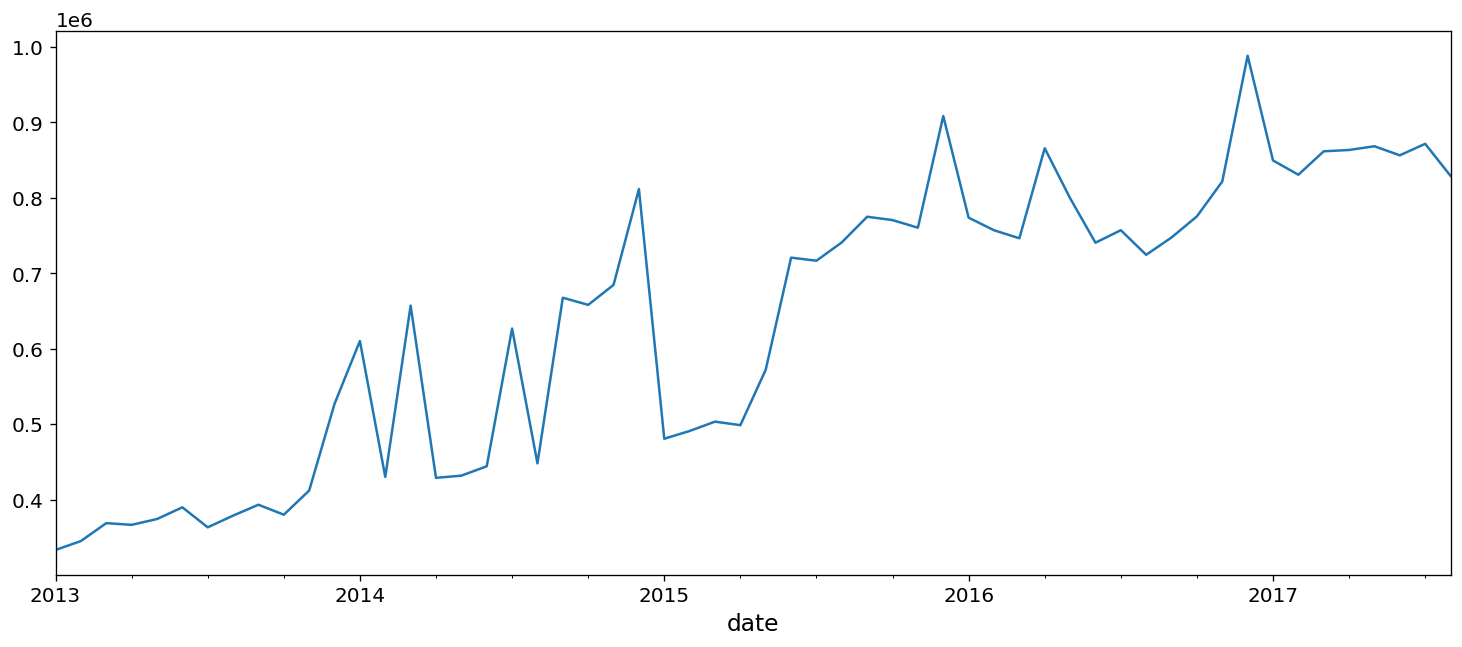

In [ ]:
# Visualizing sales time series data
train_series.plot(figsize=(15, 6))
plt.show()

In [ ]:
# From above plot we can observe that the sales were 
# increased at the end of the year.
# And dropped at starting of the year.

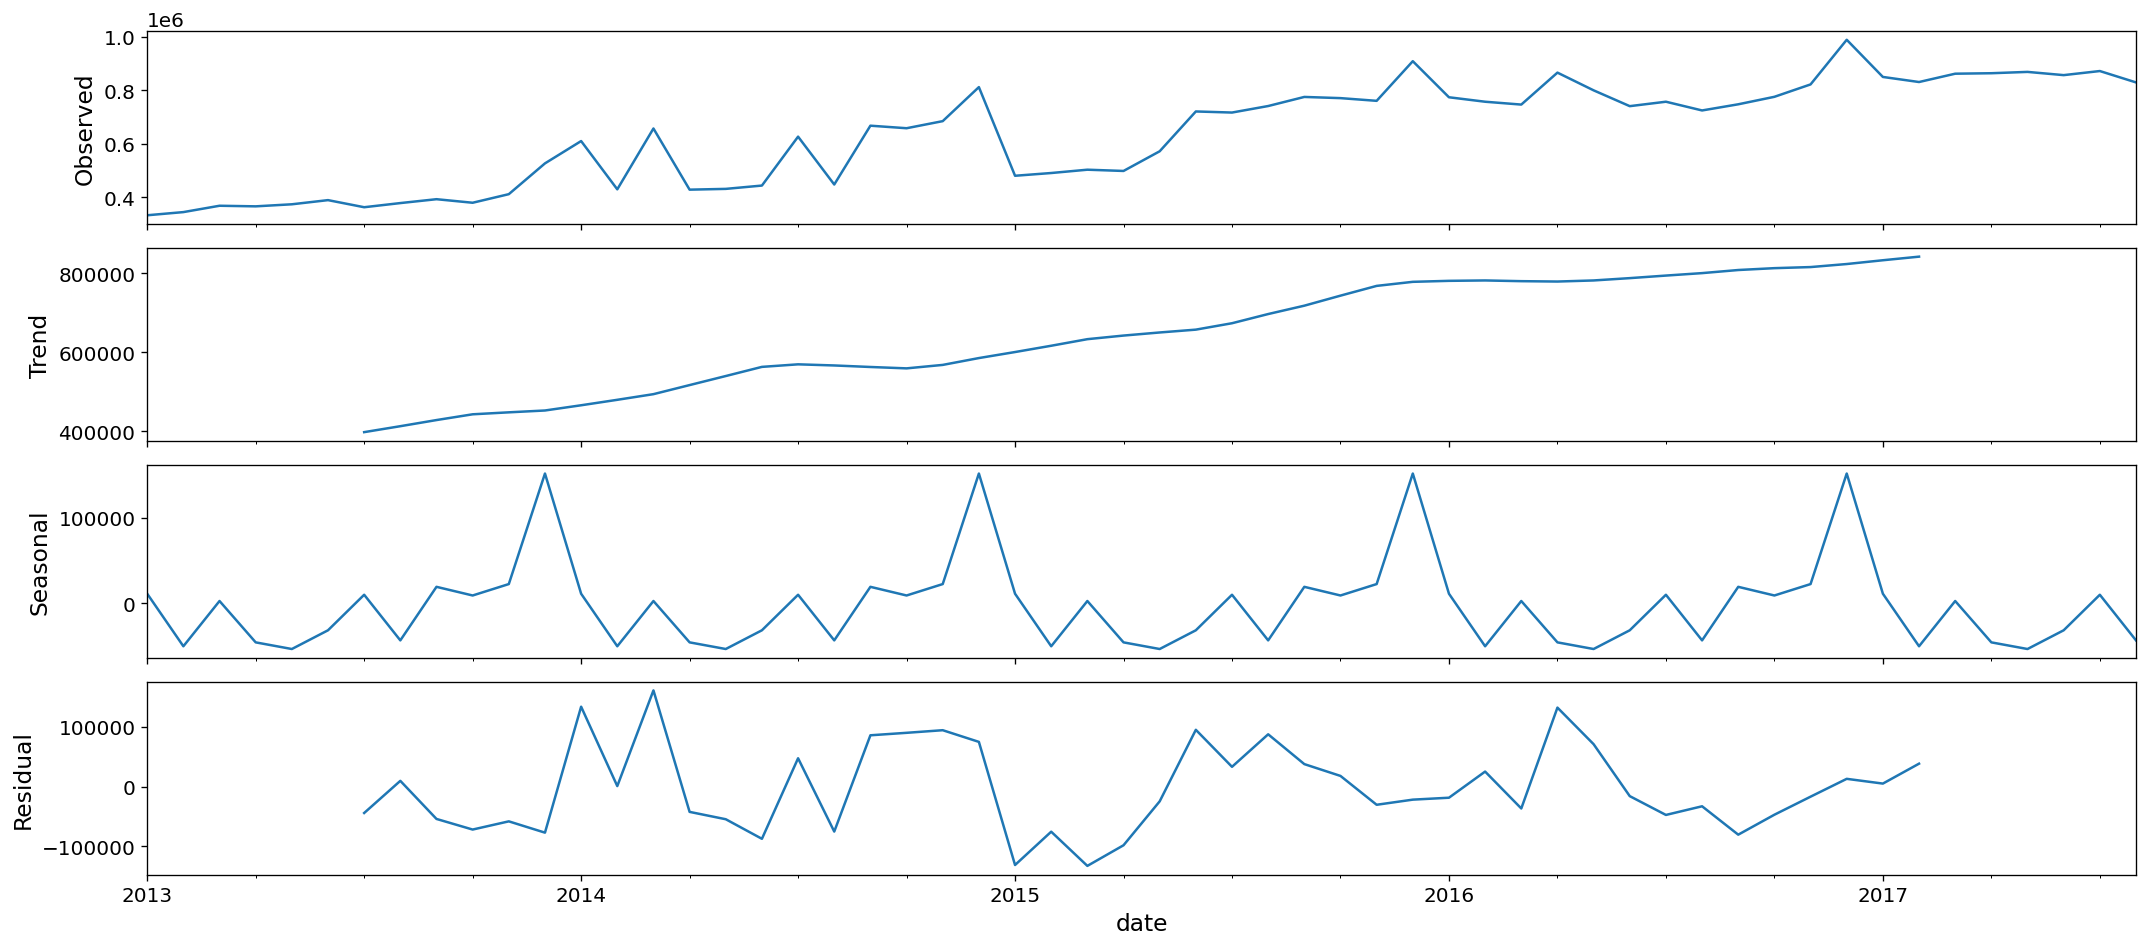

In [ ]:
# Decompose our time series into three distinct components: trend, seasonality, and noise

from pylab import rcParams
import statsmodels.api as sma
rcParams['figure.figsize'] = 18, 8
decomposition = sma.tsa.seasonal_decompose(train_series, model='additive')
fig = decomposition.plot()
plt.show()

### Exercise 4 (2.5 points): ARIMA MODEL

* Perform the following actions for Autoregressive Integrated Moving-Average(ARIMA) Model

Actions:
 - Instantiate the model
 - Train the model
 - Fit the model
 - Predict the sales
 - Compute the Metrics - RMSE, MAPE
 - Use the EXTRACTED dates for Testing (Prediction)   
 - **DO NOT USE traintestsplit**-It's a Timeseries Data.!
 - Visualise the train data, test data, and predicted data with different colors on the same plot

Plot the following:
  - autocorrelation function (ACF) and 
  - partial autocorrelation (PACF) plots

**Hint**: 
  - Use `statsmodels` for the models
  - Use `sklearn` for the metrics
  - Use `plot_acf`, `plot_pacf` for plotting the functions
  - You may refer to this [link1](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html), [link2](https://towardsdatascience.com/how-to-use-an-autoregressive-ar-model-for-time-series-analysis-bb12b7831024)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# An ARIMA model is characterized by 3 terms: p, d, q

In [ ]:
# 'p' is the order of the ‘Auto Regressive’ (AR) term. 
# It refers to the number of lags of Y to be used as predictors. 
# And 'q' is the order of the ‘Moving Average’ (MA) term. 
# It refers to the number of lagged forecast errors that should go into the ARIMA Model.
# 'd' is the minimum number of differencing needed to make the series stationary. 
# And if the time series is already stationary, then d = 0.

In [ ]:
# check if the series is stationary or not using ADF test
# Augmented Dickey Fuller Test
# ADF Test
result = adfuller(train_series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -1.5746639319379205
n_lags: 0.49630690894665747
p-value: 0.49630690894665747
Critial Values:
   1%, -3.55770911573439
Critial Values:
   5%, -2.9167703434435808
Critial Values:
   10%, -2.59622219478738


In [ ]:
# The p-value is obtained is greater than significance level of 0.05 
# and the ADF statistic is higher than any of the critical values.

In [ ]:
# Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.
# We need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
# So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [ ]:
result_1 = adfuller(train_series)
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])

ADF Statistic: -1.574664
p-value: 0.496307


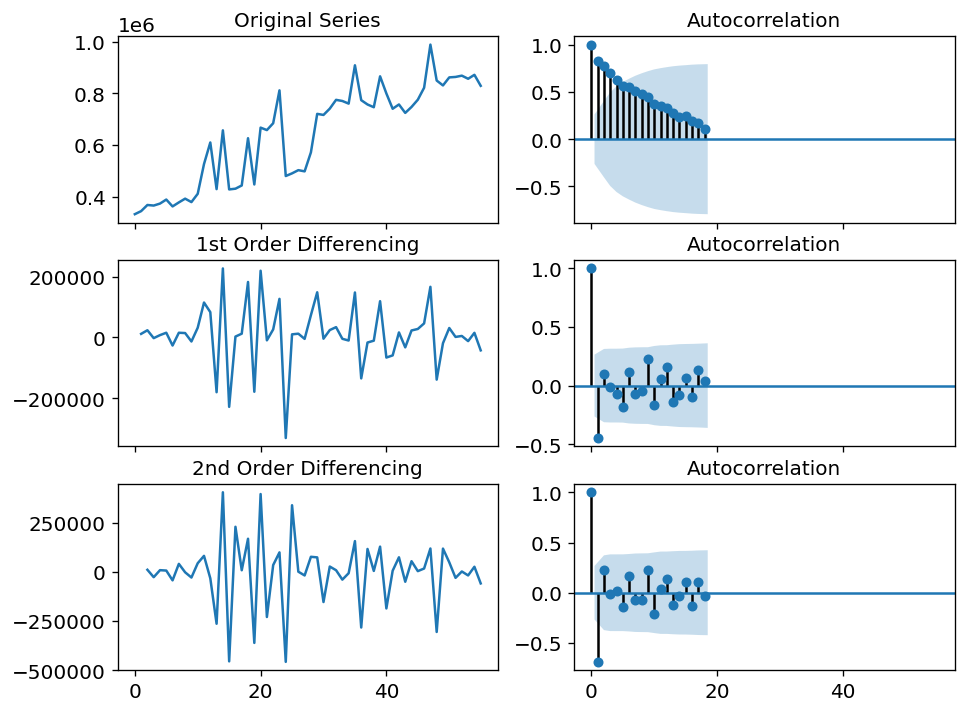

In [ ]:
# Finding 'd' value
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_series_df.sales); axes[0, 0].set_title('Original Series')
plot_acf(train_series_df.sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train_series_df.sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_series_df.sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train_series_df.sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_series_df.sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
# For the above series, the time series reaches stationarity with one order of differencing.
# So, tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).
#So, d=1

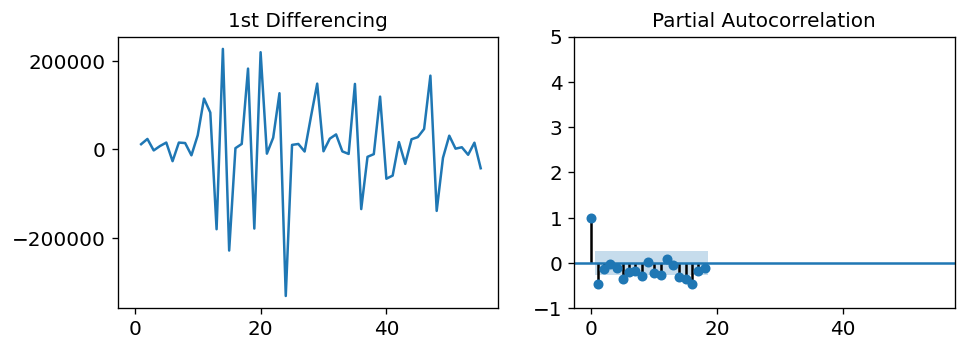

In [ ]:
# Find the order of the AR term (p)
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_series_df.sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,5))
plot_pacf(train_series_df.sales.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
# Lag1 is significant and Lag 2 turns out to be significant as well, 
# slightly managing to cross the significance limit (blue region).
# Lag3 looking good.So, lets take p=3

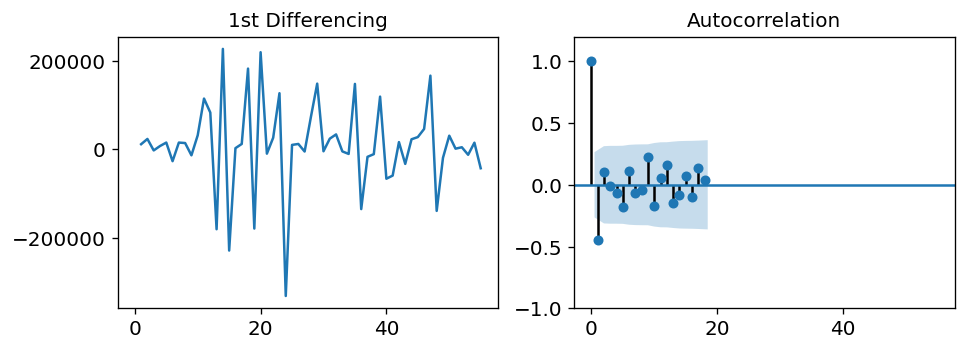

In [ ]:
# Finding the order of the MA term (q)

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_series_df.sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,1.2))
plot_acf(train_series_df.sales.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
# Lag1 is significant and Lag 2 turns out to be significant as well, 
# slightly managing to cross the significance limit (blue region).
# Lag3 looking good.So, lets take q=3

In [ ]:
# Build Model
# 3,1,3 ARIMA model  
# order = (p,d,q) ; d cannot be greater than 2
arima_model = ARIMA(train_series, order=(3,1,3))  
arima_fitted = arima_model.fit(disp=-1)

print(arima_fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   55
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -697.354
Method:                       css-mle   S.D. of innovations          73077.924
Date:                Mon, 23 May 2022   AIC                           1410.708
Time:                        14:27:11   BIC                           1426.767
Sample:                    02-01-2013   HQIC                          1416.918
                         - 08-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.03e+04   1014.428     10.155      0.000    8313.424    1.23e+04
ar.L1.D.sales    -0.4269      0.159     -2.686      0.010      -0.738      -0.115
ar.L2.D.sales    -0.5300      0.128     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
# AIC is 1410.708
# For MA3, P>|z| value is << 0.05 , for remaining MA1 and MA2 it is more than 0.05.
# So, our q value is correct.

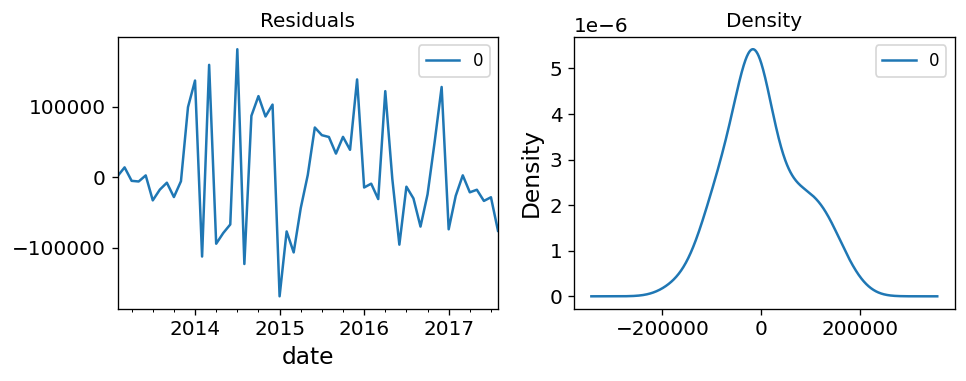

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(arima_fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
# The residual errors seem fine with near zero mean and uniform variance.

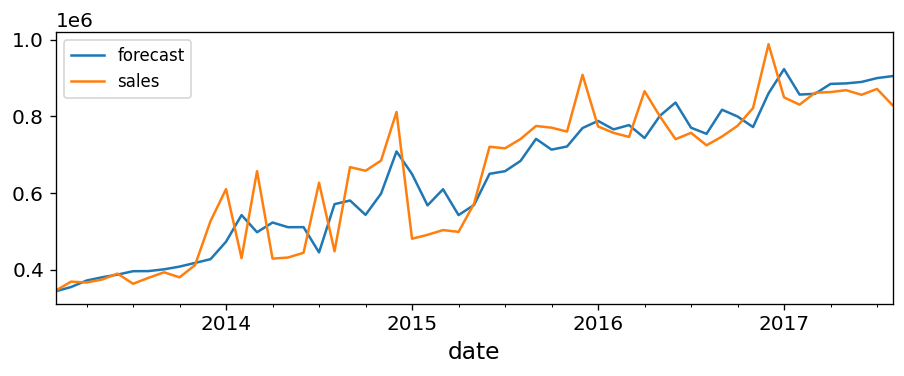

In [ ]:
# Plot the actuals against the fitted values

arima_fitted.plot_predict(dynamic=False)
plt.show()

In [ ]:
# Create Training and Test by splitting training data
train_arima = train_series_df.sales[:40]
test_arima = train_series_df.sales[40:]

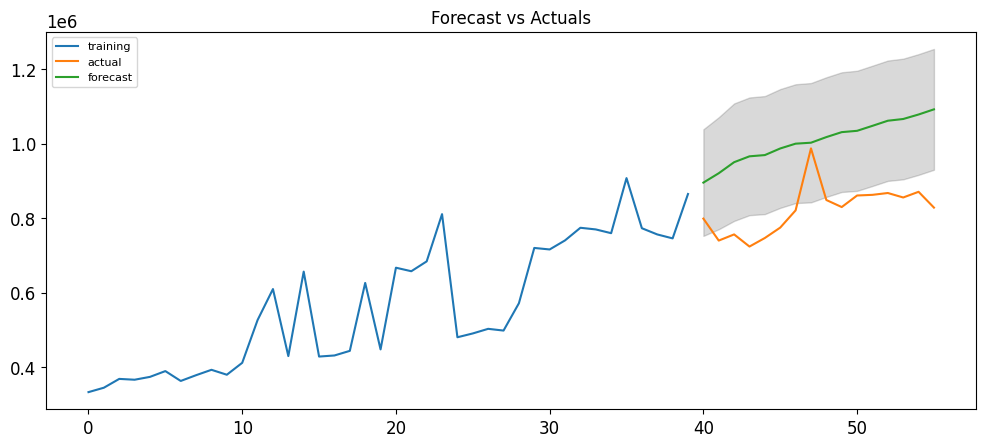

In [ ]:

# Forecast
fc, se, conf = arima_fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_arima.index)
lower_series = pd.Series(conf[:, 0], index=test_arima.index)
upper_series = pd.Series(conf[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
#Mean Absolute Percentage Error (MAPE)
#Mean Error (ME)
#Mean Absolute Error (MAE)
#Mean Percentage Error (MPE)
#Root Mean Squared Error (RMSE)
#Correlation between the Actual and the Forecast (corr)
#Min-Max Error (minmax)

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'Mean Absolute Percentage Error':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'Root Mean Squared Error':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test_arima.values)

{'Mean Absolute Percentage Error': 0.22795435127805075,
 'Root Mean Squared Error': 192734.46759235277,
 'corr': 0.5677416784140001,
 'mae': 184385.95610098273,
 'me': 184385.95610098273,
 'minmax': 0.18241256829016494,
 'mpe': 0.22795435127805075}

In [ ]:
#Around 23.0% MAPE implies the model is about 77.0% accurate in predicting the next 15 observations.

**Auto ARIMA model**

In [ ]:
#Auto ARIMA model
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
auto_arima_model = pm.auto_arima(train_series_df.sales, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1445.958, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1662.752, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1455.437, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1630.531, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1447.760, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1448.240, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1625.997, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1450.014, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1449.236, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.578 seconds


In [ ]:
# Build Model by using AUTO ARIMA model
# 1,0,1 ARIMA model  
# order = (p,d,q) ; d cannot be greater than 2
auto_arima_model = ARIMA(train_series, order=(1,0,1))  
auto_arima_fitted = auto_arima_model.fit(disp=-1)

print(auto_arima_fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   56
Model:                     ARMA(1, 1)   Log Likelihood                -718.621
Method:                       css-mle   S.D. of innovations          88950.617
Date:                Mon, 23 May 2022   AIC                           1445.243
Time:                        14:27:15   BIC                           1453.344
Sample:                    01-01-2013   HQIC                          1448.384
                         - 08-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.39e+05   1.61e+05      3.976      0.000    3.24e+05    9.54e+05
ar.L1.sales     0.9724      0.033     29.424      0.000       0.908       1.037
ma.L1.sales    -0.4492      0.142     -3.167    

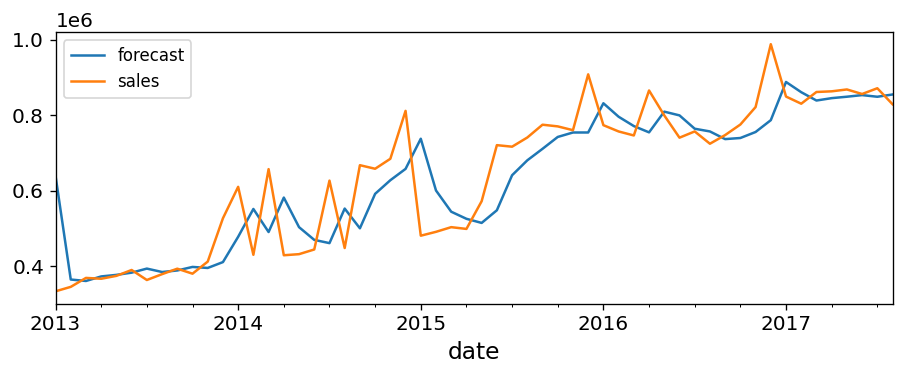

In [ ]:
# Plot the actuals against the fitted values

auto_arima_fitted.plot_predict(dynamic=False)
plt.show()

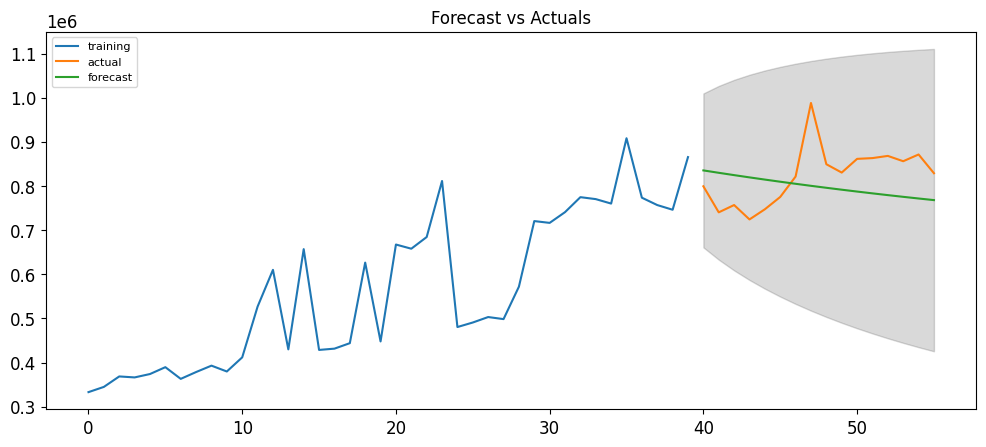

In [ ]:

# Forecast
auto_fc, auto_se, auto_conf = auto_arima_fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
auto_fc_series = pd.Series(auto_fc, index=test_arima.index)
auto_lower_series = pd.Series(auto_conf[:, 0], index=test_arima.index)
auto_upper_series = pd.Series(auto_conf[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(auto_fc_series, label='forecast')
plt.fill_between(lower_series.index, auto_lower_series, auto_upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast_accuracy(auto_fc, test_arima.values)

{'Mean Absolute Percentage Error': 0.08773148687267736,
 'Root Mean Squared Error': 82310.17473265457,
 'corr': -0.6111595428508158,
 'mae': 73146.78702148874,
 'me': -24367.51510253395,
 'minmax': 0.08479706789470542,
 'mpe': -0.022550876733121384}

In [ ]:
# Around 8.7% MAPE implies the model is about 92.3% accurate in predicting the next 15 observations.

### Exercise 5 (2.5 point): SARIMA MODEL

* Perform the following actions for Seasonal Autoregressive Integrated Moving Average (SARIMA) Model

Actions:
 - Instantiate the model
 - Train the model
 - Fit the model
 - Predict the sales
 - Compute the Metrics - RMSE, MAPE
 - Use the EXTRACTED dates for Testing (Prediction)   
 - **DO NOT USE traintestsplit**-It's a Timeseries Data.!
 - Visualise the train data, test data, and predicted data with different colors on the same plot 

Plot the following:
  - autocorrelation function (ACF) and 
  - partial autocorrelation (PACF) plots

**Hint**: 
  - Use `statsmodels` for the models
  - Use `sklearn` for the metrics
  - Use `acf`, `pacf`, `plot_acf`, `plot_pacf` for plotting the functions
  - You may refer to this [link1](https://towardsdatascience.com/how-to-use-an-autoregressive-ar-model-for-time-series-analysis-bb12b7831024), [link2](https://www.statsmodels.org/dev/tsa.html), [link3](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/#:~:text=The%20implementation%20is%20called%20SARIMAX,weighted%20input%20to%20the%20model.)


In [ ]:
#Seasonal differencing is similar to regular differencing, but, 
# instead of subtracting consecutive terms, you subtract the value from previous season

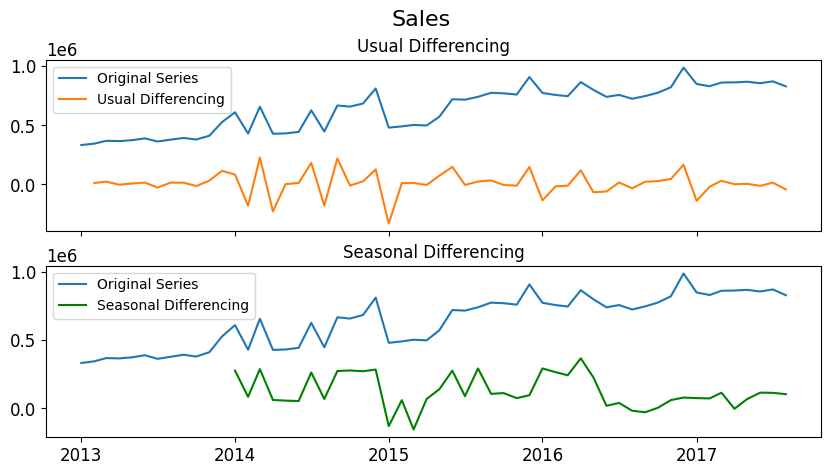

In [ ]:
# YOUR CODE HERE

# Plot
sarima_fig, sarima_axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
sarima_axes[0].plot(train_series[:], label='Original Series')
sarima_axes[0].plot(train_series[:].diff(1), label='Usual Differencing')
sarima_axes[0].set_title('Usual Differencing')
sarima_axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
sarima_axes[1].plot(train_series[:], label='Original Series')
sarima_axes[1].plot(train_series[:].diff(12), label='Seasonal Differencing', color='green')
sarima_axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Sales', fontsize=16)
plt.show()

In [ ]:
# From above plots, the seasonal spikes is intact after applying usual differencing (lag 1). 
# Whereas, it is rectified a bit after seasonal differencing.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_series, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1150.944, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1157.384, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1153.349, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1156.982, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1189.704, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1154.921, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1152.195, Time=0.39 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1154.192, Time=0.20 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1149.657, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1153.228, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1150.680, Time=0.33 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   56
Model:             SARIMAX(3, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -568.672
Date:                            Mon, 23 May 2022   AIC                           1149.344
Time:                                    14:27:23   BIC                           1160.049
Sample:                                         0   HQIC                          1153.314
                                             - 56                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    7.96e+04   3.63e+04      2.191      0.028    8385.286    1.51e+05
ar.L1          0.3868      0.205      1.886      0.059      -0.015       0.789
ar.L2          0.2714      0.218      1.244      0.214      -0.156       0.699
ar.L3         -0.1647      0.186     -0.885      0.376      -0.529       0.200
ma.S.L12      -0.7158      0.339     -2.111      0.035      -1.380      -0.051
sigma2      1.041e+10      0.108   9.62e+10      0.000    1.04e+10    1.04e+10
===================================================================================
Ljung-Box (Q):                       20.47   Jarque-Bera (JB):                 2.70
Prob(Q):                              1.00   Prob(JB):                         0.26
Heteroskedasticity (H):               0.15   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+26. Standard errors may be unstable.
"""

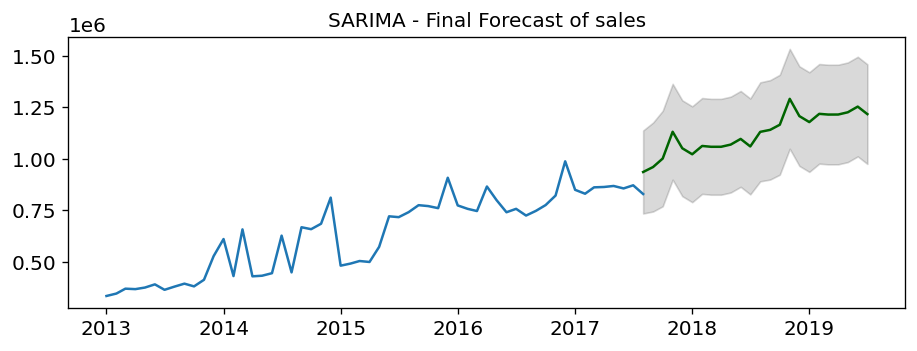

In [ ]:
# Forecast
n_periods = 24
sarima_fitted, sarima_confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train_series.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(sarima_fitted, index=index_of_fc)
lower_series = pd.Series(sarima_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(sarima_confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_series)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of sales")
plt.show()

### Exercise 6 (2.5 point): SARIMAX MODEL

* Perform the following actions for Seasonal Autoregressive Integrated Moving Average Extended (SARIMAX) Model

Actions:
 - Instantiate the model
 - Train the model
 - Fit the model
 - Predict the sales
 - Compute the Metrics - RMSE, MAPE
 - Use the EXTRACTED dates for Testing (Prediction)   
 - **DO NOT USE traintestsplit**-It's a Timeseries Data.!
 - Visualise the train data, test data, and predicted data with different colors on the same plot

Plot the following:
  - autocorrelation function (ACF) and 
  - partial autocorrelation (PACF) plots

**Hint**: 
  - Use `statsmodels` for the models
  - Use `sklearn` for the metrics
  - Use `plot_acf`, `plot_pacf` for plotting the functions
  - You may refer to this [link1](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html), [link2](https://towardsdatascience.com/how-to-use-an-autoregressive-ar-model-for-time-series-analysis-bb12b7831024)


In [ ]:
# YOUR CODE HERE
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Our goal here is to use a “grid search” to find the optimal set of parameters 
#that yields the best performance for our model

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sma.tsa.statespace.SARIMAX(train_series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1633.8455129211088
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1257.9995997913927
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1160.7285700168436


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1213.4020202029676
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1171.0314611756453
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1149.076748607287
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:857.8235781329272
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1149.023524164555
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1569.8164958072139
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1220.4012021612903
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1123.9889608326314
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2750.2209818639853
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1270.5533693718537
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1215.1138187567708
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:854.5417917204636
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2744.7785499941365
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1399.346995379829
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1126.7788284177989
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1116.9205855713988
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2649.7862089476816
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1123.29644127895

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1202.5517034025236
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1364.7363206890977
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1059.417573615212
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1081.3543227402229
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2611.8900749698714
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1113.1752861034404
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1061.272324366334
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:803.7466364118247
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2570.794458825395
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1426.1914416020043
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1126.1454750656092
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1136.1059824972565
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2827.1049338644007
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1125.8082558296662
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1143.2548106404768
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:805.0325620595024
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2821.4144209322235
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1389.84356785938

In [ ]:
#The above output suggests that SARIMAX(1, 1, 0)x(1, 1, 0, 12) yields the lowest AIC value of 775.6069338751114. 
#Therefore we should consider this to be optimal option.

mod = sma.tsa.statespace.SARIMAX(train_series,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3809      0.348     -1.095      0.274      -1.063       0.301
ar.S.L12      -0.4625      0.260     -1.776      0.076      -0.973       0.048
sigma2       1.42e+10    3.8e-12   3.73e+21      0.000    1.42e+10    1.42e+10


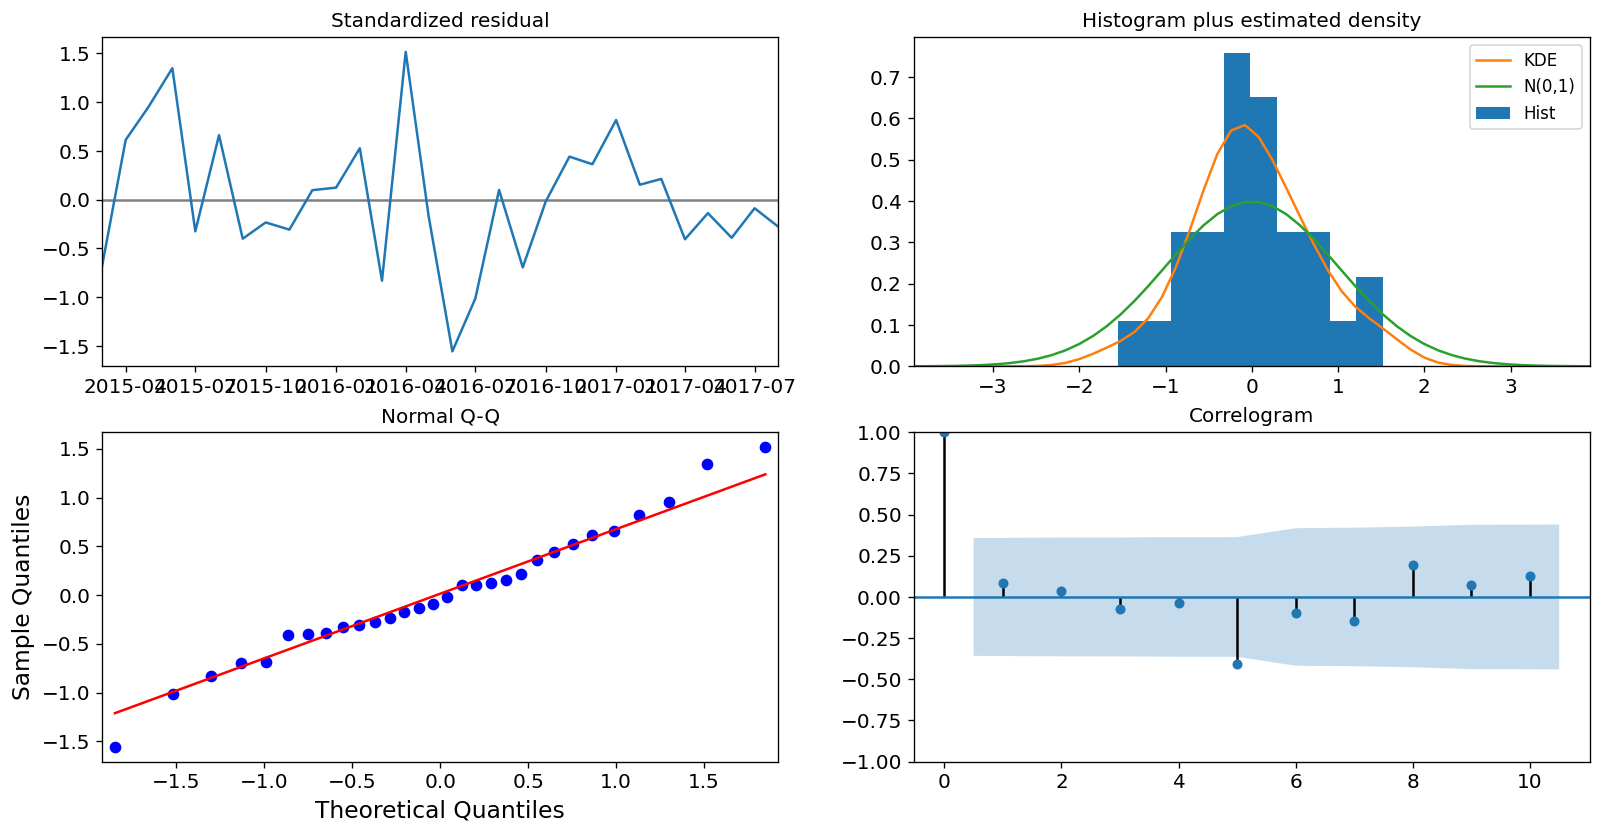

In [ ]:
#We should always run model diagnostics to investigate any unusual behavior.

results.plot_diagnostics(figsize=(16, 8))
plt.show()

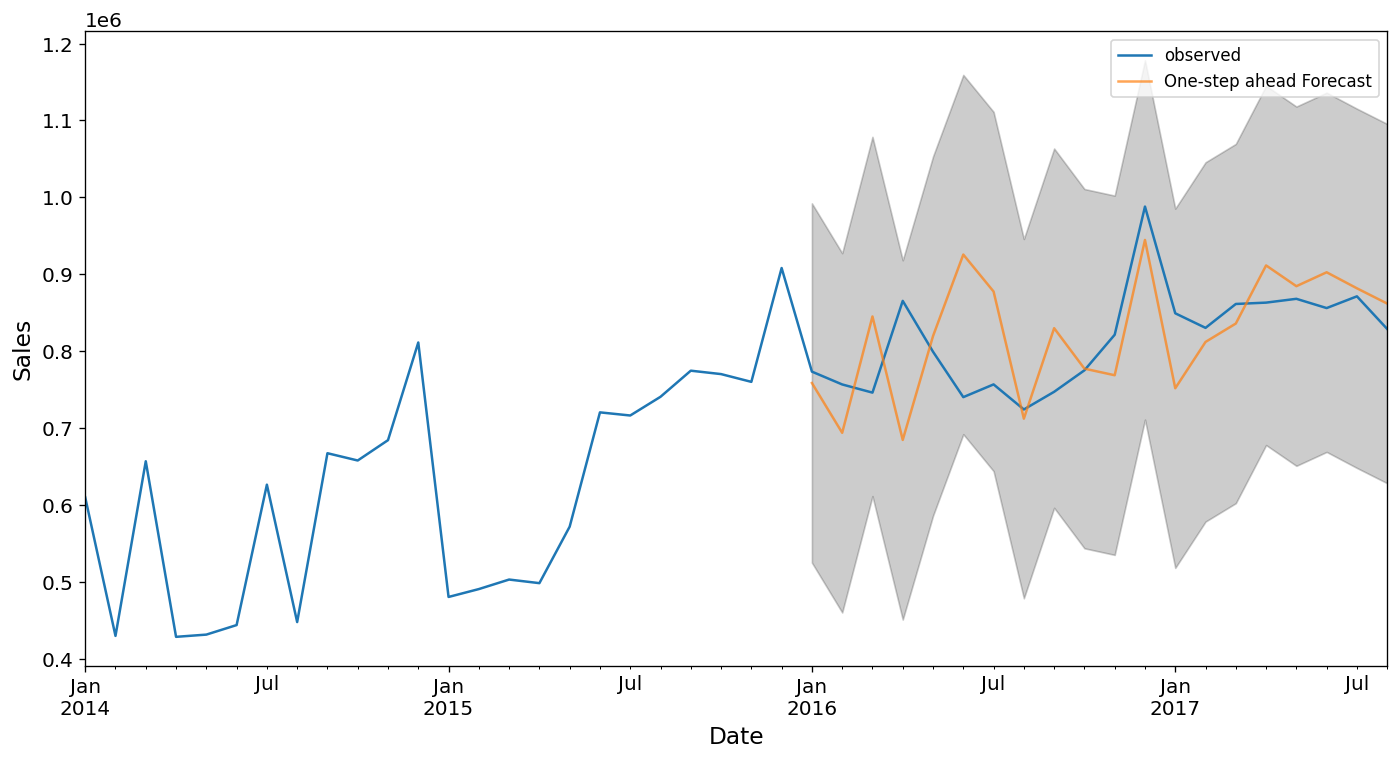

In [ ]:
# Validating forecasts: 
# we compare predicted sales to real sales of the time series, 
# and we set forecasts to start at 2014–01–01 to the end of the data.

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train_series['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# The line plot is showing the observed values compared to the rolling forecast predictions.
# Overall, our forecasts almost align with the true values.

In [ ]:
# Mean Squared Error
# MSE of an estimator measures the average of the squares of the errors — that is, 
# the average squared difference between the estimated values and what is estimated. 
#The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, 
# the closer we are to finding the line of best fit.

series_forecasted = pred.predicted_mean
series_truth = train_series['2016-01-01':]
mse = ((series_forecasted - series_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6203813592.99


In [ ]:
# Root Mean Squared Error
# RMSE tells us that our model was able to forecast the average daily sales in the test set within 78764.29 of the real sales. 
# Our daily sales range from around 300000 to over 910000. 
# In my opinion, this is a pretty good model so far.
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 78764.29


In [ ]:
# YOUR CODE HERE

### Ungraded exercises, Discussion and Food for Thought:

- What is the learning outcome?
- How is the data preprocessing different from the previous ML projects?
- What could be other alternate/supporting metrics to determine the model's performance?
- **EXPLORE** on your own,  the following models
  - Moving-Average(MA) Model
  - Autoregressive(AR) Model
  - Autoregressive Moving-Average(ARMA) Model
  - `var` model
- How do the integrated models behave compared to MA, AR, and ARMA models?
